# Структура данных Series

Импорт библиотек

In [1]:
import polars as pl
import numpy as np

В *Polars* `Series` – это одномерный массив данных, который может содержать значения различных типов (числовые, строковые, булевы, даты и т.д.) и ассоциированный с ним массив меток, называемый индексом. Индекс генерируется автоматически (целочисленные значения: 0, 1, 2, 3 и т.д.)

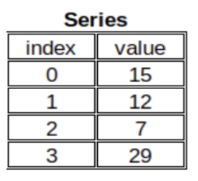

## Создание объекта Series

Создаются объекты с помощью конструктора класса `Series`, который имеет следующий синтаксис:

`polars.Series(name=None, values=None, dtype=None, strict=True, nan_to_null=False)`

- **name** - имя объекта Series (Тип: `str` или `None`);
  
- **values** - значения, на базе которой будет создан объект Series (Тип: `list`, `array`, или другой массив тип данных);

- **dtype** - тип данных (Тип: `DataType` или `None`);

- **strict** - если установлено в `True`, это приведет к строгой проверке типов данных при создании серии. Если `False`, Polars будет более гибким в отношении типов, по умолчанию `True` (Тип: `bool`);

- **nan_to_null** - если установлено в `True`, все значения NaN будут преобразованы в значения null. По умолчанию `False` (Тип: `bool`).

Пустой объект `Series` будет выглядеть так:

In [2]:
srs = pl.Series()
print(srs)

shape: (0,)
Series: '' [null]
[
]


In [3]:
display(srs)

""
null


### Cоздание объекта Series из списка

In [4]:
lst = [34, 57, 5, 24]
s = pl.Series(lst)
print(s)

shape: (4,)
Series: '' [i64]
[
	34
	57
	5
	24
]


### Создание объекта Series из словаря

Допустим, имеем словарь количества учета медведей:

In [5]:
dict_bears = {'белый медведь': 20, 'панда': 14, 'бурый медведь': 3, 'гризли': 8}

Метод `pl.Series` ожидает, что мы передадим значения в виде списка или массива, а не словаря. Поэтому, если мы хотим создать серию на основе словаря, то должны отдельно указать имена (ключи) и значения. 

In [6]:
# Создание Series
srs_bears_cnt = pl.Series(name="количество медведей", values=list(dict_bears.values()))
print(srs_bears_cnt)

shape: (4,)
Series: 'количество медведей' [i64]
[
	20
	14
	3
	8
]


**Примечание**: если хотим сохранить ключи в качестве индексов и значения в качетсве данных, лучше создать *DataFrame*.

### Создание объекта Series из NumPy-массива

In [7]:
arr = np.array([37, 15.20, 48.01])
srs = pl.Series(arr)
print(srs)

shape: (3,)
Series: '' [f64]
[
	37.0
	15.2
	48.01
]


## Типы данных

Проверка типа данных - это одно из первых действий, которое необходимо произвести после загрузки новых данных в *polars* для дальнейшего анализа.

Основные типы данных, используемые в polars:

- `Int8`, `Int16`, `Int32`, `Int64`: целые числа (с различной разрядностью);
- `UInt8`, `UInt16`, `UInt32`, `UInt64`: беззнаковые целые числа (может хранить только положительные значения и ноль);
- `Float32`, `Float64`: числа с плавающей точкой;
- `Boolean`: логический тип данных (True/False);
- `Utf8`: строки (текстовые данные);
- `Date`: дата (без времени);
- `Datetime`: дата и время с поддержкой временных зон;
- `Time`: время (без даты);
- `List`: списки (массивы) переменной длины, которые могут содержать элементы разных типов;
- `Struct`: структуры, которые могут содержать несколько полей различных типов.

Эти типы данных позволяют эффективно хранить и обрабатывать данные в *Polars*, обеспечивая при этом высокую производительность и гибкость при выполнении операций с ними (данными).

## Методы, параметры и атрибуты Series

### Параметры Series

Еще раз посмотрим на конструкцию класса Series:

`pl.Series(name=None, values=None, dtype=None, strict=True, nan_to_null=False)`

Пройдемся по его параметрам.

#### Параметр `name` конструктора класса Series

**name** - Имя серии. Если хотим задать имя для ванашей серии, то указываем его, иначе оставляем `None`.

In [8]:
series = pl.Series(name="my_series", values=[1, 2, 3, None])
print(series)

shape: (4,)
Series: 'my_series' [i64]
[
	1
	2
	3
	null
]


In [9]:
display(series)

my_series
i64
1
2
3
null


#### Параметр `values` конструктора класса Series

**values** - Значения, которые мы хотим поместить в серию. Доброе напомиание: без него наша серия будет пустой.

In [10]:
srs = pl.Series()
print(srs)

shape: (0,)
Series: '' [null]
[
]


#### Параметр `dtype` конструктора класса Series

**dtype** - Опциональный параметр для указания типа данных серии. Если не указан, *Polars* попытается определить тип данных автоматически на основе значений.

Но можем и сами, например:

In [11]:
series = pl.Series(name="my_series", values=[1, 2, 3, None], dtype=pl.Int32)
print(series)

shape: (4,)
Series: 'my_series' [i32]
[
	1
	2
	3
	null
]


#### Параметр `strict` конструктора класса Series

**strict** - Параметр, который используется для определения того, как строго следует проверять типы данных при создании серии.


Если `strict=True`, то при создании серии будет происходить строгая проверка типов, что может привести к ошибкам, если данные не соответствуют ожидаемым типам. 

Если `strict=False`, то библиотека будет более гибкой и попытается привести данные к нужному типу данных. Если приведение невозможно, то присвоется значение `null`.

**Замечание**: Параметр `strict=True` при создании серии в данном контексте может не вызвать ошибку, потому что он не проверяет соответствие типов при создании серии. Он больше влияет на операции, которые могут возникнуть позже, например, при попытке выполнения арифметических операций или преобразования типов.

Например:

In [12]:
# Пример с strict=True
# Создаем серию с целыми числами
s_strict = pl.Series("a", [1, 2, 3], dtype=pl.Int32, strict=True)
print(s_strict)

shape: (3,)
Series: 'a' [i32]
[
	1
	2
	3
]


Здесь всё хорошо

In [13]:
# Попробуем создать серию с несовместимыми типами (строки вместо целых чисел)
try:
    s_strict_invalid = pl.Series("b", ["a", "b", "c"], dtype=pl.Int32, strict=True)
except TypeError as e:
    print(f"Ошибка при создании серии с strict=True: {e}")

Ошибка при создании серии с strict=True: unexpected value while building Series of type Int32; found value of type String: "a"

Hint: Try setting `strict=False` to allow passing data with mixed types.


In [14]:
# Попробуем создать серию с несовместимыми типами (строки вместо целых чисел)
try:
    s_strict_invalid = pl.Series("b", ["1", "2", "3"], dtype=pl.Int32, strict=True)
    print(s_strict_invalid)
except TypeError as e:
    print(f"Ошибка при создании серии с strict=True: {e}")

Ошибка при создании серии с strict=True: unexpected value while building Series of type Int32; found value of type String: "1"

Hint: Try setting `strict=False` to allow passing data with mixed types.


In [15]:
# Пример с strict=False
s_strict_invalid = pl.Series("b", ["1", "2", 3], dtype=pl.Int64, strict=False)
print(s_strict_invalid)

shape: (3,)
Series: 'b' [i64]
[
	1
	2
	3
]


Видим, что строки "1", "2" приобразованы к нужному типу данных.

In [16]:
# Пример с strict=False
s_strict_invalid = pl.Series("c", ["a", "re", 3], dtype=pl.Int64, strict=False)
print(s_strict_invalid)

shape: (3,)
Series: 'c' [i64]
[
	null
	null
	3
]


Видим, что строки `"a", "re"` *polars* приобразовать к нужному типу данных не удалось, и установил на их место значение `null`.

#### Параметр `nan_to_null` конструктора класса Series 

**nan_to_null** - Параметр используется для управления тем, как обрабатываются значения NaN.

Если **nan_to_null** установлен в `True`, все значения NaN будут преобразованы в значения null. Если `False`, значения NaN останутся в своем исходном виде.

**Замечание**: В случае, если для создания серии используется массив *numpy*, указываем, как обращаться со значениями `np.nan`. Данный параметр не действует для данных, отличных от *numpy*.

In [17]:
# Создание серии с NaN значениями
arr = np.array([1.0, 2.0, np.nan, 4.0])
s_nan = pl.Series("a", [1.0, 2.0, np.nan, 4.0], nan_to_null=False)
print(s_nan)

shape: (4,)
Series: 'a' [f64]
[
	1.0
	2.0
	NaN
	4.0
]


В этом случае значение NaN остается в серии.

In [18]:
# Создание серии с NaN значениями и перевод в null
arr = np.array([1.0, 2.0, np.nan, 4.0])
s_null = pl.Series("a", arr, nan_to_null=True)
print(s_null)

shape: (4,)
Series: 'a' [f64]
[
	1.0
	2.0
	null
	4.0
]


### Атрибуты Series

- dtype: возвращает тип данных `Series`;
- flags: редоставляет метаданные о `Series`;
- name: возвращает имя `Series`
- shape: возвращает кортеж, содержащий размеры `Series`, т.е., количество элементов в `Series`.

In [19]:
arr = np.array([37, 15.20, 48.01, np.nan])
srs = pl.Series(name="a", values=arr, dtype=pl.Float64, strict=True, nan_to_null=True)
print(srs)

shape: (4,)
Series: 'a' [f64]
[
	37.0
	15.2
	48.01
	null
]


In [20]:
print(srs.dtype)     # Тип данных
print(srs.name)      # Имя
print(srs.shape)     # Размер
print(srs.flags)     # Метки

Float64
a
(4,)
{'SORTED_ASC': False, 'SORTED_DESC': False}


### Методы Series

`Series` в *Polars* имеет множество методов. Полный список можно найти в [документации *Polars*](https://docs.pola.rs/api/python/stable/reference/series/index.html).

#### Некоторые методы

##### Абсолютное значение. Метод `abs()`

Метод `abs()` возвращает объект Series с абсолютными значениями (взятыми по модулю).

In [21]:
srs = pl.Series([-16, -9, 35, 77, -30])
# Применяем abs()
srs_abs = srs.abs()
print(srs)

shape: (5,)
Series: '' [i64]
[
	-16
	-9
	35
	77
	-30
]


##### Создание копии. Метод `clone()`

Метод `clone()` создает глубокую копию Series, так что любые изменения в исходной Series не будут влиять на новую копию, и наоборот.

In [22]:
sqw = srs.clone()
print(sqw)

shape: (5,)
Series: '' [i64]
[
	-16
	-9
	35
	77
	-30
]


##### Округление значений. Метод `round()`

Метод `round()` позволяет округлять значения в структурах Series. Параметру `decimals` этого метода передается целое число - количество знаков после запятой.

In [23]:
arr = np.array([37, 15.28, 48.01, np.nan])
srs = pl.Series(name="a", values=arr, dtype=pl.Float64, strict=True, nan_to_null=True)
srs_round = srs.round(1)
print(srs_round)

shape: (4,)
Series: 'a' [f64]
[
	37.0
	15.3
	48.0
	null
]


##### Возведение в степень. Метод `pow()`

Метод pow() позволяет возводить значения в структурах Series. Параметру exponent этого метода передается число, в которую надо возвести элементы Series.

In [24]:
s = pl.Series("foo", [1, 2, 3, 4])
s_pow = s.pow(3)
print(s_pow)

shape: (4,)
Series: 'foo' [i64]
[
	1
	8
	27
	64
]


#### Статистические методы

In [25]:
srs = pl.Series([3, 2, 8, -6, 100, 5, 3, 3, 2, None])
print(srs)

shape: (10,)
Series: '' [i64]
[
	3
	2
	8
	-6
	100
	5
	3
	3
	2
	null
]


In [26]:
print(srs.max()) # максимальное значение
print(srs.min()) # минимальное значение
print(srs.mode()) # мода
print(srs.mean()) # среднее значение (при налчии null не учитывает их, т.е. элементов меньше)
print(srs.median()) # медиана
print(srs.sum()) # сумма
print(srs.len()) # кол-во элементов (строк)
print(srs.n_unique()) # кол-во уникальных элементов
print(srs.product()) # произведение элементов
print(srs.quantile(0.2)) # квантиль (значение от 0.0 до 1.0)
print(srs.count())  # возвращает количество не нулевых элементых

100
-6
shape: (1,)
Series: '' [i64]
[
	3
]
13.333333333333334
3.0
120
10
7
-2592000
2.0
9


##### Метод `describe()`

Чтобы получить краткую сводную статистику серии можно воспользоваться методом `describe()`.

In [27]:
srs.describe()

statistic,value
str,f64
"""count""",9.0
"""null_count""",1.0
"""mean""",13.333333
"""std""",32.710854
"""min""",-6.0
"""25%""",2.0
"""50%""",3.0
"""75%""",5.0
"""max""",100.0


#### Арифметические операции

Со структурами данных *polars* можно поэлементно проводить операции сложения, вычитания, умножения, деления.

In [28]:
arr_1 = np.array([37, -15.20, 48.01, np.nan])
srs_1 = pl.Series(name="a", values=arr_1, dtype=pl.Float64, strict=True, nan_to_null=True)

arr_2 = np.array([np.nan, 8, 15, np.nan])
srs_2 = pl.Series(name="a", values=arr_2, dtype=pl.Float64, strict=True, nan_to_null=True)
print(srs_1, srs_2, sep='\n\n')

shape: (4,)
Series: 'a' [f64]
[
	37.0
	-15.2
	48.01
	null
]

shape: (4,)
Series: 'a' [f64]
[
	null
	8.0
	15.0
	null
]


In [29]:
print(srs_1 + srs_2) # Сложение
print(srs_1 - srs_2) # Вычитание
print(srs_1 * srs_2) # Умножение
print(srs_1 / srs_2) # Деление
print(srs_1 + 5) # умножение/деление/сложение/вычитание на константу
print(srs_1 ** 2) # возведение в степень

shape: (4,)
Series: 'a' [f64]
[
	null
	-7.2
	63.01
	null
]
shape: (4,)
Series: 'a' [f64]
[
	null
	-23.2
	33.01
	null
]
shape: (4,)
Series: 'a' [f64]
[
	null
	-121.6
	720.15
	null
]
shape: (4,)
Series: 'a' [f64]
[
	null
	-1.9
	3.200667
	null
]
shape: (4,)
Series: 'a' [f64]
[
	42.0
	-10.2
	53.01
	null
]
shape: (4,)
Series: 'a' [f64]
[
	1369.0
	231.04
	2304.9601
	null
]


Если в элементах есть `null`, то на данной позиции вернется `null`.

## Работа с конкретными значениями объекта Series

In [30]:
arr_1 = np.array([37, -15.20, 48.01, np.nan])
srs_1 = pl.Series(name="a", values=arr_1, dtype=pl.Float64, strict=True, nan_to_null=True)
display(srs_1)

a
f64
37.0
-15.2
48.01
null


### Обращаемся к конкретным значениям объекта Series

Для того, чтобы получить значение конкретного элемента серии, нужно в квадратных скобках указать метку индекса этого элемента:

In [31]:
print(srs_1[1])

-15.2


Хоть индексы мы и не видем при выводе Series, но они есть. Индексация начинается с нуля.

Для получения значений нескольких элеменов, используются срезы:

In [32]:
print(srs_1[1:4])

shape: (3,)
Series: 'a' [f64]
[
	-15.2
	48.01
	null
]


### Изменение значения

Для изменения значений в объектах Series используется оператор присваивания `'='`.

In [33]:
print(srs_1)

shape: (4,)
Series: 'a' [f64]
[
	37.0
	-15.2
	48.01
	null
]


In [34]:
srs_1[1] = 55
print(srs_1)

shape: (4,)
Series: 'a' [f64]
[
	37.0
	55.0
	48.01
	null
]


### Добавление нового элемента в структуру Series

Для добавления нового элемента в Series в библиотеке Polars можно использовать различные методы. Один из способов — это использование метода `append()`.

In [35]:
# Создаем Series
series = pl.Series("values", [1, 2, 3])

# Добавляем новый элемент в конец Series
new_element = 4
series = series.append(pl.Series("", [new_element]))

print(series)

shape: (4,)
Series: 'values' [i64]
[
	1
	2
	3
	4
]


Также можно использовать метод `extend()` для добавления нескольких элементов сразу.

**Замечание**: метод `extend()` изменяет текущий объект серии. В него необходимо передавать серию.

In [36]:
# Создаем Series
series = pl.Series("values", [1, 2, 3])

# Добавляем несколько новых элементов в конец Series
new_elements = [8, 9, 7]
series.extend(pl.Series(new_elements))

print(series)

shape: (6,)
Series: 'values' [i64]
[
	1
	2
	3
	8
	9
	7
]


### Удаление элементов из структуры Series

В библиотеке *Polars* удаление элементов из серии можно осуществить несколькими способами в зависимости от того, какие именно данные необходимо удалить.

#### Удаление по индексу. Метод `slise()`

Методом`slise()` можно получить кусочек серии.

`Series.slice(offset: int, length: int | None = None) → Series[source]`

Имеет два параметра:
- `offset`: начальный индекс (поддерживается отрицательная индексация);
- `length`: длина среза. Если установлено значение `None`, будут выбраны все строки, начиная с выбранной.


In [37]:
# Создаем серию
series = pl.Series("values", ["a", "b", "c", "d"])

# Исключаем второй элемент ("b"), используя slice
result = series.slice(0, 1).append(series.slice(2, None))

print(result)

shape: (3,)
Series: 'values' [str]
[
	"a"
	"c"
	"d"
]


#### Удаление по условию, фильтрация. Метод `filter()`

In [38]:
# Создаем серию
series = pl.Series("values", [1, 2, 3, 4])

# Удаляем все элементы меньше 3
result = series.filter(series >= 3)

print(result)

shape: (2,)
Series: 'values' [i64]
[
	3
	4
]
